In [3]:
import numpy as np
import pylab as plt
from matplotlib import colors 
import pandas as pd


%matplotlib inline

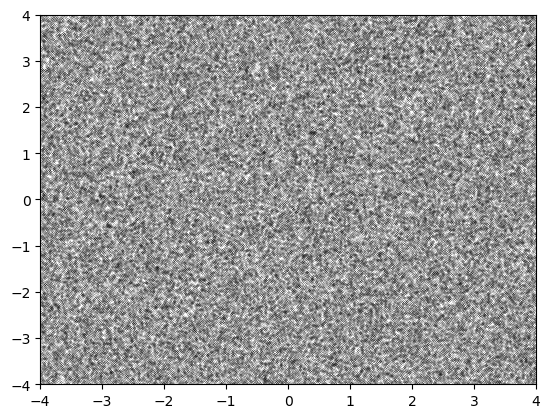

In [4]:
zix = np.random.uniform(low = -4, high = 4, size = 150000)
ziy = np.random.uniform(low = -4, high = 4,size = 150000)


                 

plt.scatter(zix, ziy, color = 'black', s = 0.01)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()



In [5]:
## zi ==> posição inicial
# zf ==> poisição final dps da deflexão

e1 = 0.5     #=> fração da massa 
r1x = -0.75    #=> posição da lente j em relação a origem
r1y = 0
e2 = 0.5     #=> fração da massa 
r2x = 0.75
r2y = 0

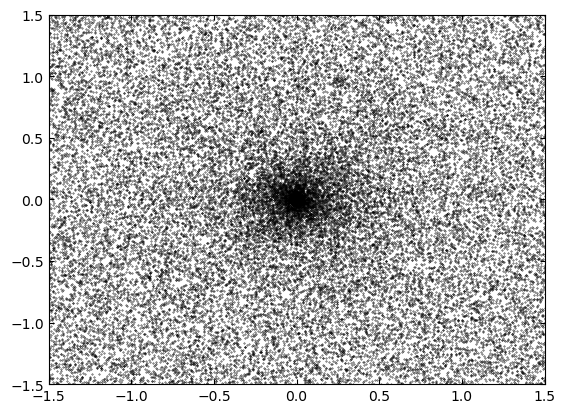

In [6]:
r1x = 0


zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x)
zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.scatter(zfx, zfy, color = 'black', s = 0.1)


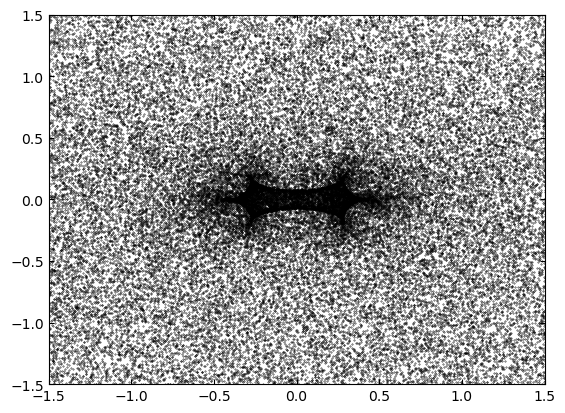

In [7]:
e1 = 0.5     #=> fração da massa 
r1x = -0.75    #=> posição da lente j em relação a origem
r1y = 0
e2 = 0.5     #=> fração da massa 
r2x = 0.75
r2y = 0

zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x) - (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(zix - r2x)
zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)- (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(ziy - r2y)

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

plt.scatter(zfx, zfy, color = 'black', s = 0.1)


In [8]:
## Para o mapa de magnificação, preciso de mais pontos
zix = np.random.uniform(low = -2, high = 2, size = 1500000)
ziy = np.random.uniform(low = -2, high = 2,size = 1500000)


## Duas lentes
zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x) - (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(zix - r2x)
zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)- (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(ziy - r2y)

(array([[4., 0., 0., ..., 1., 0., 2.],
        [2., 1., 1., ..., 0., 1., 2.],
        [1., 1., 1., ..., 1., 0., 2.],
        ...,
        [0., 1., 3., ..., 2., 0., 1.],
        [0., 1., 1., ..., 1., 2., 0.],
        [3., 0., 4., ..., 0., 1., 3.]]),
 array([-1.32987019, -1.32721067, -1.32455115, ...,  1.32432983,
         1.32698935,  1.32964887]),
 array([-1.28156088, -1.27899863, -1.27643637, ...,  1.2755678 ,
         1.27813005,  1.2806923 ]),
 <matplotlib.collections.QuadMesh at 0x1724e265550>)

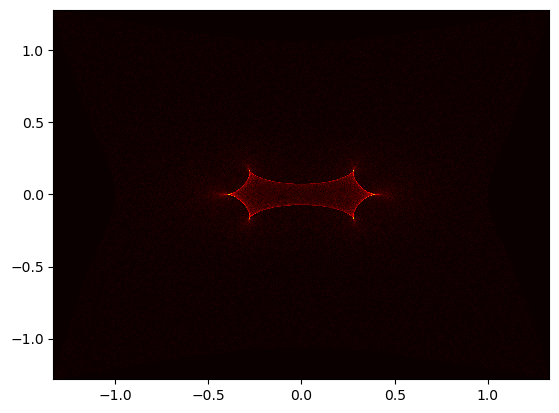

In [9]:
##Mapa de magnificação
plt.hist2d(zfx, zfy, 
           bins = 1000,  
           cmap ="hot")
           #cmin = 0.5)

In [10]:
engine='python'
def take_data(site, nome):
    from bs4 import BeautifulSoup
    import requests as req
    
    url = site
    html = req.get(url).text
    
    arq = nome
    
    with open(arq, "w") as file:
        file.write(str(html))
    
    data = pd.read_csv(arq, sep='     ')
    return data
    
## em análise, vai ser na mao msm agr    

In [11]:
data_moa = take_data("https://ogle.astrouw.edu.pl/cont/4_main/epl/blg390/MOA2_data.txt", "moa")

C:\Users\ylana\AppData\Local\Temp\ipykernel_17268\1448217075.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(arq, sep='     ')


In [12]:
## web scrapping ogle observatory

from bs4 import BeautifulSoup
import requests as req

url = "https://ogle.astrouw.edu.pl/ogle/ogle3/ews/2005/blg-390/phot.dat"
html = req.get(url).text
soup = BeautifulSoup(html, 'html5lib')

with open("copy.txt", "w") as file:
    file.write(str(html))

In [13]:
data_ogle = pd.read_csv('copy.txt', sep=' ')

data_ogle = data_ogle.rename(columns={'2452125.56972' : 'time_hjd'})
data_ogle = data_ogle.rename(columns={'15.559' : 'I magnitude'})
data_ogle = data_ogle.rename(columns={'0.006' : 'Imagnitude_erro'})


(2453520.0, 2453650.0)

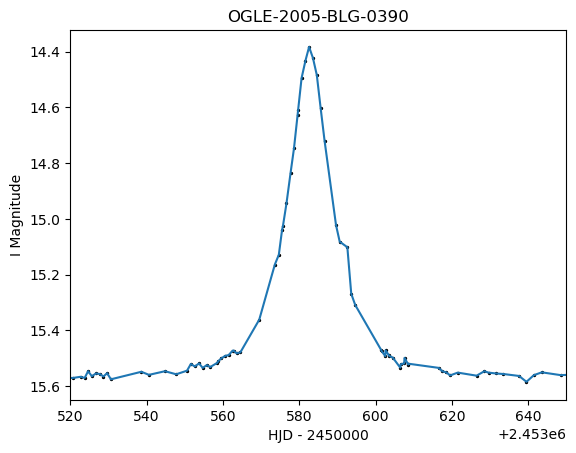

In [14]:
x = data_ogle['time_hjd']
y = data_ogle['I magnitude']
#yerro = data_ogle['Imagnitude_erro']


plt.title('OGLE-2005-BLG-0390')
plt.xlabel('HJD - 2450000')
plt.ylabel('I Magnitude')
plt.scatter(x,y, s=2, c='black')
plt.plot(x,y)
plt.gca().invert_yaxis()
#plt.errorbar(x, y, yerr = yerror, xerr = None, fmt= 'o', ecolor='gray', elinewidth=0.5, s = 2)  
plt.xlim(2.45352e6,2.45365e6)